**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
data = boston['data']

In [5]:
feature_names = boston["feature_names"]

feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Создайте датафреймы X и y из этих данных.

In [6]:
X = pd.DataFrame(data, columns=feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
target = boston["target"]

target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [8]:
y = pd.DataFrame(target, columns=["price"])

y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Масштабируйте данные с помощью StandardScaler.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [15]:
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

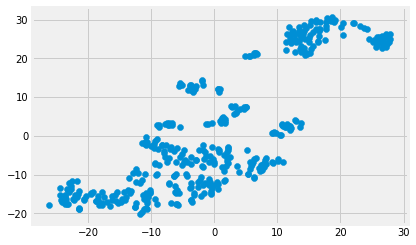

In [16]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

**Задание 2**


С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. 

In [46]:
from sklearn.cluster import KMeans

Kmeans_model = KMeans(n_clusters=3, random_state=42)

In [47]:
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3], 
                             [6, 9], 
                             [9, 3]])
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    
    df = pd.DataFrame({'x': data[:,0], 'y': data[:, 1]}, columns=['x', 'y'])
    df = df.sample(frac=1.0)

    return df

Параметр max_iter должен быть равен 100, random_state сделайте равным 42. 

In [48]:
train = make_data(100, 42)

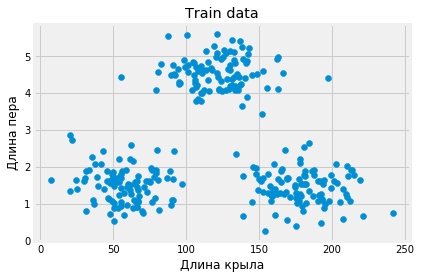

In [49]:
plt.scatter(train['x'], train['y'])

plt.xlabel('Длина крыла')
plt.ylabel('Длина пера')

plt.title('Train data')

plt.show()

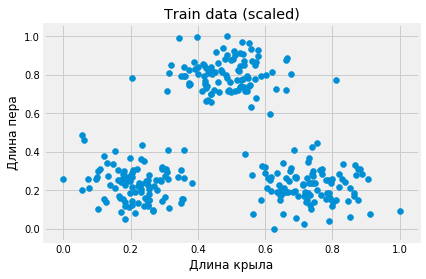

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=['x', 'y'])

plt.scatter(train_scaled['x'], train_scaled['y'])

plt.xlabel('Длина крыла')
plt.ylabel('Длина пера')

plt.title('Train data (scaled)')

plt.show()

In [52]:
train_labels = Kmeans_model.fit_predict(train_scaled)

print(train_labels)

[2 2 1 0 2 2 1 2 2 0 2 2 1 1 1 2 2 2 2 0 1 1 2 1 0 0 1 0 1 0 2 0 1 1 1 2 0
 0 0 2 0 0 1 2 1 1 1 0 1 1 2 2 1 0 0 0 1 2 0 1 2 0 2 0 1 0 1 2 1 1 0 0 2 0
 1 1 2 1 2 2 0 2 2 1 1 1 2 1 2 2 0 0 2 1 0 1 0 2 2 2 2 2 0 1 2 2 0 2 1 1 0
 0 0 2 1 0 1 2 1 1 0 2 2 2 2 2 2 1 2 2 2 0 1 1 1 0 2 2 1 2 0 0 2 0 2 2 1 0
 0 2 0 0 0 1 2 2 0 1 2 1 0 2 2 2 2 2 1 2 1 1 1 2 0 1 1 2 1 0 0 1 0 2 0 0 1
 1 0 1 0 0 1 2 1 2 2 0 0 2 1 1 1 0 2 2 0 0 1 1 1 2 1 1 0 1 2 0 1 1 0 2 2 1
 2 1 0 0 1 0 1 1 0 0 2 0 0 0 1 0 1 0 0 0 1 0 2 2 0 1 1 0 1 1 2 2 2 1 2 0 0
 1 0 0 2 2 0 0 0 1 1 1 2 2 2 0 0 0 0 1 0 1 0 0 1 2 0 0 2 1 2 0 2 1 1 1 1 0
 2 0 0 2]


Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Text(0.5, 1.0, 'Train data')

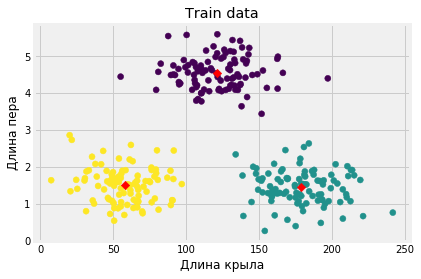

In [55]:
centers = scaler.inverse_transform(Kmeans_model.cluster_centers_)

plt.scatter(train['x'], train['y'], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlabel('Длина крыла')
plt.ylabel('Длина пера')

plt.title('Train data')


Вычислите средние значения price и CRIM в разных кластерах.